<a href="https://colab.research.google.com/github/takeshinishimura/Cooperative/blob/main/face_recognition2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U retinaface_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from retinaface.pre_trained_models import get_model

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 16606001.JPG to 16606001 (3).JPG


In [4]:
model = get_model("resnet50_2020-07-20", max_size = 2048)
model.eval()

/usr/local/lib/python3.9/dist-packages/torch/hub.py:480: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


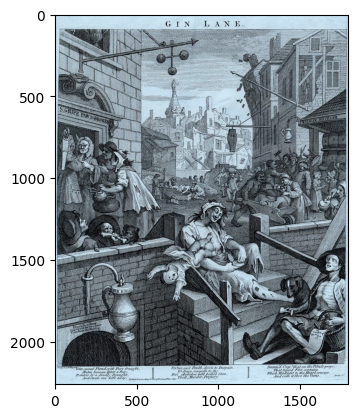

In [5]:
file_name = next(iter(uploaded))
img = cv2.imread(file_name)
plt.imshow(img)

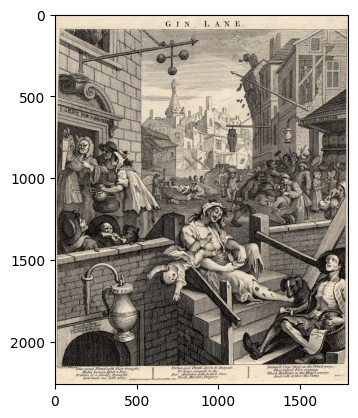

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [7]:
feces = model.predict_jsons(img_rgb)
print(feces)

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[{'bbox': [1646.9, 1466.79, 1730.88, 1568.29], 'score': 0.99, 'landmarks': [[1667.27, 1497.45], [1702.53, 1506.42], [1672.13, 1515.65], [1658.82, 1537.32], [1684.79, 1543.75]]}, {'bbox': [946.55, 1179.32, 1027.11, 1275.32], 'score': 0.97, 'landmarks': [[986.79, 1210.7], [1013.36, 1230.16], [995.99, 1238.64], [966.87, 1240.49], [988.86, 1256.09]]}, {'bbox': [144.74, 773.5, 202.32, 850.51], 'score': 0.97, 'landmarks': [[158.72, 798.93], [186.14, 801.1], [170.03, 816.9], [158.35, 827.18], [182.74, 828.97]]}, {'bbox': [276.34, 1275.85, 354.69, 1368.36], 'score': 0.8, 'landmarks': [[314.0, 1306.93], [342.68, 1307.34], [336.17, 1323.02], [318.53, 1340.36], [339.84, 1341.61]]}]


In [8]:
def draw_res(img, feces):
  for i in feces:
    bbox = i['bbox']
    if not bbox:
      continue
    pt1 = (int(bbox[0]), int(bbox[1]))
    pt2 = (int(bbox[2]), int(bbox[3]))
    cv2.rectangle(img, pt1 = pt1, pt2 = pt2, color = (255, 0, 0), thickness = 10)
  return img

img_out = draw_res(img_rgb, feces)

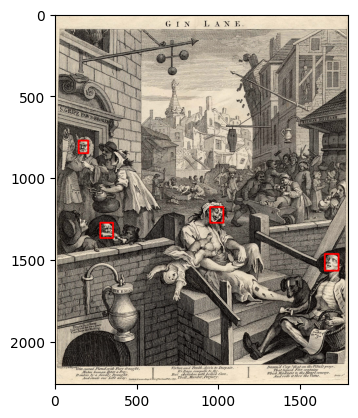

In [9]:
plt.imshow(img_out)

In [10]:
face_recognition2 = cv2.cvtColor(img_out, cv2.COLOR_RGB2BGR)
cv2.imwrite('face_recognition2.jpg', face_recognition2)
files.download('face_recognition2.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>